   no   pc     wbc      mc   ast      bc     ldh  diagnosis
0   1  Low     Low     Low  High  Normal  Normal       True
1   2  Low     Low  Normal  High  Normal    High       True
2   3  Low    High  Normal  High  Normal  Normal      False
3   4  Low    High  Normal  High    High  Normal       True
4   5  Low  Normal    High  High  Normal  Normal      False
[[1 1 1 0 1 1]
 [1 1 2 0 1 0]
 [1 0 2 0 1 1]
 [1 0 2 0 0 1]
 [1 2 0 0 1 1]
 [1 2 2 0 1 0]
 [2 1 1 0 1 1]
 [2 0 2 0 1 1]
 [2 0 2 0 0 0]
 [2 2 0 0 1 1]
 [2 2 0 0 1 0]
 [0 1 1 1 1 1]
 [0 2 0 1 1 1]
 [0 2 0 1 0 0]
 [0 0 2 1 1 0]
 [1 2 0 0 0 1]
 [2 2 0 0 0 1]
 [0 1 1 1 1 0]
 [2 2 2 0 1 1]
 [2 0 2 0 1 0]
 [2 1 2 0 1 0]
 [1 0 2 0 0 0]
 [1 1 1 0 0 0]
 [0 0 2 1 1 1]
 [0 2 2 1 1 1]]
[1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0]
Accuracy: 0.7142857142857143

Report
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accurac

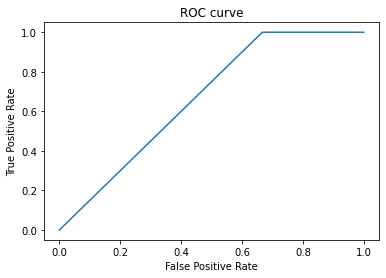

AUC of the prediction:0.6666666666666667


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('covid.csv')
print(data.head())

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

print(X)
print(Y)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model = MultinomialNB()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred))

print("\nReport")
print(classification_report(Y_test,y_pred))
import matplotlib.pyplot as plt
from sklearn import metrics
fpr,tpr,threshods=metrics.roc_curve(Y_test,y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()


print("AUC of the prediction:{0}".format(metrics.auc(fpr,tpr)))